# Netflix Business case study

#### To analyze the data and generate insights that could help Netflix corpraition to decide which type of shows/movies to produce and how they can grow the business in different countries

## Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Loading datat set 
#### Loading the data set and having a look at the data set

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### This data set is of movies and TV shows that netflix offers.
#### Seems like there are some missing values and some columns have repeating values, we need to clean those columns for proper evaluation

## Observation of data shape, data type, missing value detection, statical summary

In [3]:
df.shape

(8807, 12)

In [4]:
df.ndim

2

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df['show_id'].nunique()

8807

In [7]:
df['rating'].nunique()

17

In [8]:
print(df['release_year'].max())
print(df['release_year'].min())

2021
1925


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### This is a 2D array with 8807 rows and 12 columns.
#### This contains information about 8807 unique Movie/TV show spaning from 1925 to 2021 categorised into 17 different ratings.

## Missing Value detection and cleaning

In [10]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

#### There are six columns namely director, cast, country, date_added, rating and duration with null values

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### There are 4307 across the six colums, 
#### We need to clean the null data before we can do further analysis

## Imputation to replace missing values 
#### We are gonna replace missing values with "no data" or we are gonna drop certain rows with missing values

In [12]:
df['director'].fillna("No Director", inplace = True)
df['cast'].fillna("No Cast", inplace = True)
df['country'].fillna("No Country", inplace = True)
df.dropna(subset = ['date_added', 'rating','duration'], inplace = True)
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

#### As we can see we have removed all missing values.
#### Since the number of missing values in columns datat_added, rating and  duration are significantly less compared to other missing datas we have removed those rows all together and this shouldnt affect our anylasis in a major way.

In [13]:
df['show_id'].nunique()

8790

#### As we can see, after dropoing and cleaning the missing data the total number of rows are reduced from 8807 to 8790 unique media

# Finding out nested datas

In [14]:
df[df.country.apply(lambda country: ',' in str(country))].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


#### We can see there are multiople countries mentioned insde a singel row, this may interfier with our analysis.
#### We have to un-nest for clearer analysis

In [15]:
split_df = df[['show_id', 'country', "listed_in", "director", "cast"]]
split_df.head(2)

,show_id,country,listed_in,director,cast
0,s1,United States,Documentaries,Kirsten Johnson,No Cast
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."


In [17]:
split_df['country'] = split_df['country'].apply(lambda x: str(x).split(', '))
split_df['listed'] = split_df['listed_in'].apply(lambda x: str(x).split(', '))
split_df['director'] = split_df['director'].apply(lambda x: str(x).split(', '))
split_df['cast'] = split_df['cast'].apply(lambda x: str(x).split(', '))
split_df = split_df.explode('country')
split_df = split_df.explode('listed')
split_df = split_df.explode('director')
split_df = split_df.explode('cast')

#### Now each country, each listed_in, each director and each cast have their own row 

In [18]:
split_df.head()

,show_id,country,listed_in,director,cast,listed
0,s1,United States,Documentaries,Kirsten Johnson,No Cast,Documentaries
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,Ama Qamata,International TV Shows
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,Ama Qamata,TV Dramas
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,Ama Qamata,TV Mysteries
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,Khosi Ngema,International TV Shows


#### Now we need to combine with the original data frame

In [19]:
merge_df = pd.merge(df, split_df, on = 'show_id')
merge_df.head(2)

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,country_y,listed_in_y,director_y,cast_y,listed
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Documentaries,Kirsten Johnson,No Cast,Documentaries
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,"International TV Shows, TV Dramas, TV Mysteries",No Director,Ama Qamata,International TV Shows


#### Now to drop unnecessary columns 

In [20]:
merge_df = merge_df.drop(columns=['country_x', 'listed_in_x', 'director_x', 'cast_x', 'listed_in_y'], axis=1)

In [21]:
merge_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country_y,director_y,cast_y,listed
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,No Cast,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,No Director,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,No Director,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,No Director,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,No Director,Khosi Ngema,International TV Shows


# Non_Graphical analysis 

In [22]:
print("Shows: ", merge_df.show_id.nunique())
print("Director: ", merge_df.director_y.nunique())
print("Cast: ", merge_df.cast_y.nunique())
print("Countries: ", merge_df.country_y.nunique())
print("Genere: ", merge_df.listed.nunique())
print("Rating: ", merge_df.rating.nunique())
print("Latest year: ", max(merge_df.release_year))
print("Oldest year: ", min(merge_df.release_year))

Shows:  8790
Director:  4992
Cast:  36393
Countries:  128
Genere:  42
Rating:  14
Latest year:  2021
Oldest year:  1925


#### With this we can infer that Netflix has 8790 shows from the year 1925 to 2021 being broadcasted to 128 countries.
#### The shows are very varied with 42 Generes and 14 different ratings.
#### There are 4992 Directors and 36393 Cast members associted with the shows in Netflix's library.

In [23]:
merge_df.groupby('country_y')['show_id'].nunique().sort_values(ascending = False)

country_y
United States         3680
India                 1046
No Country             829
United Kingdom         803
Canada                 445
                      ... 
Mongolia                 1
Ecuador                  1
East Germany             1
Dominican Republic       1
Somalia                  1
Name: show_id, Length: 128, dtype: int64

#### The top three countries Netflix needs to focus on are United states, India and United kingdom

# Exploratory Analysis and Visualization 

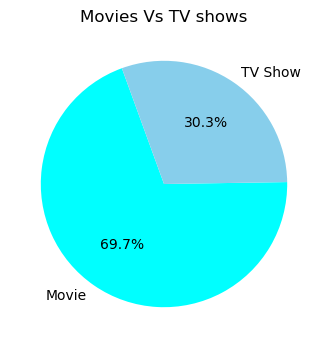

In [24]:
plt.figure(figsize=(4,4))
plt.title("Movies Vs TV shows")
plt.pie(df.type.value_counts(),
labels = df.type.value_counts().index, colors=['cyan','skyblue'],autopct='%1.1f%%',
startangle=110)
plt.show()

#### Thre are more movies compared to TV-shows

## Movies and TV-Series released throught the years

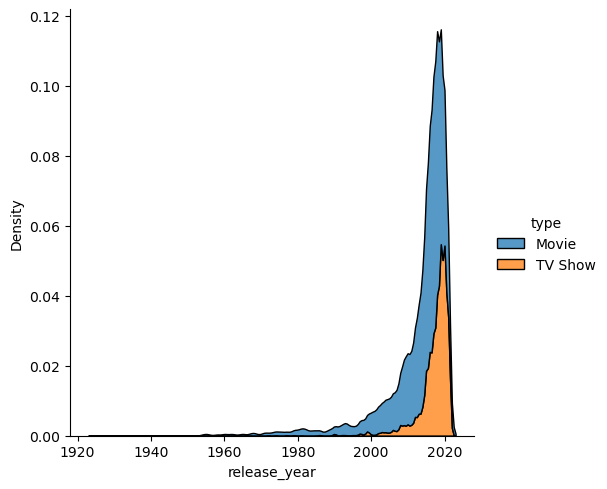

In [25]:
sns.displot(data=merge_df, x="release_year", hue="type", multiple="stack", kind="kde")

## Number of movies produces in top 10 countries

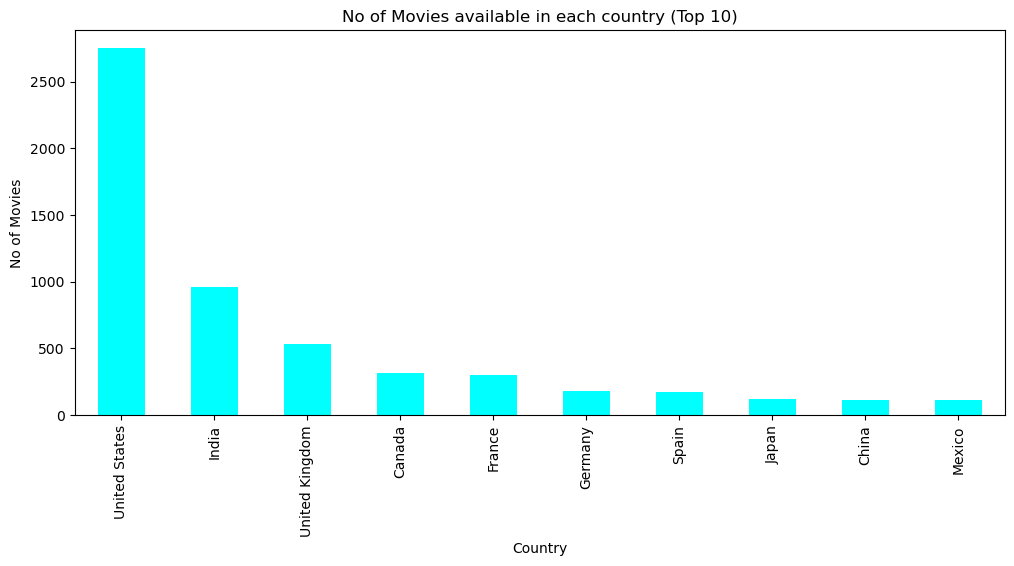

In [26]:
movie_df = merge_df[(merge_df['type'] == 'Movie') & (merge_df['country_y'] != 'No Country')] #Filter out movies
movie_country = movie_df.groupby('country_y')['title'].nunique() #Group by country and count unique
movie_country_10 = movie_country.nlargest(10) #Top 10 countries by movie count
plt.figure(figsize=(12,5))
movie_country_10.plot(kind='bar', color='cyan')
plt.title("No of Movies available in each country (Top 10)")
plt.xlabel('Country')
plt.ylabel('No of Movies')
plt.show()

## Numbere of TV-series produced in top 10 countries 

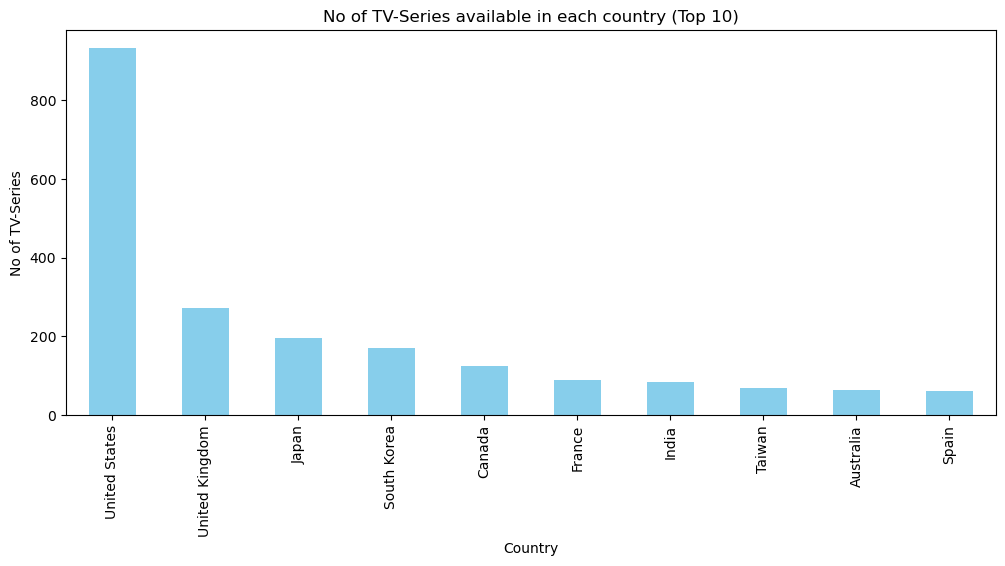

In [27]:
tv_df = merge_df[(merge_df['type'] == 'TV Show') & (merge_df['country_y'] != 'No Country')] #Filter out TV-series
tv_country = tv_df.groupby('country_y')['title'].nunique()
tv_country_10 = tv_country.nlargest(10)
plt.figure(figsize = (12,5))
tv_country_10.plot(kind='bar', color ='skyblue')
plt.title("No of TV-Series available in each country (Top 10)")
plt.xlabel('Country')
plt.ylabel('No of TV-Series')
plt.show()

#### By comparing the Top 10 countries for movies and Top 10 countries for TV-series, we can infer that
#### 1) US holds the top place for both movies and TV-series, people in US enjoy both TV seris and Movies equaly 
#### 2) Indaian market has more movies than TV-seris, maybe we need to focus on releasing more TV-series in the untaped market
#### 3) Japan is the opposite of India, where they have more TV-Series than movies, release more Movies for the untaped market

## Ratings with the most content

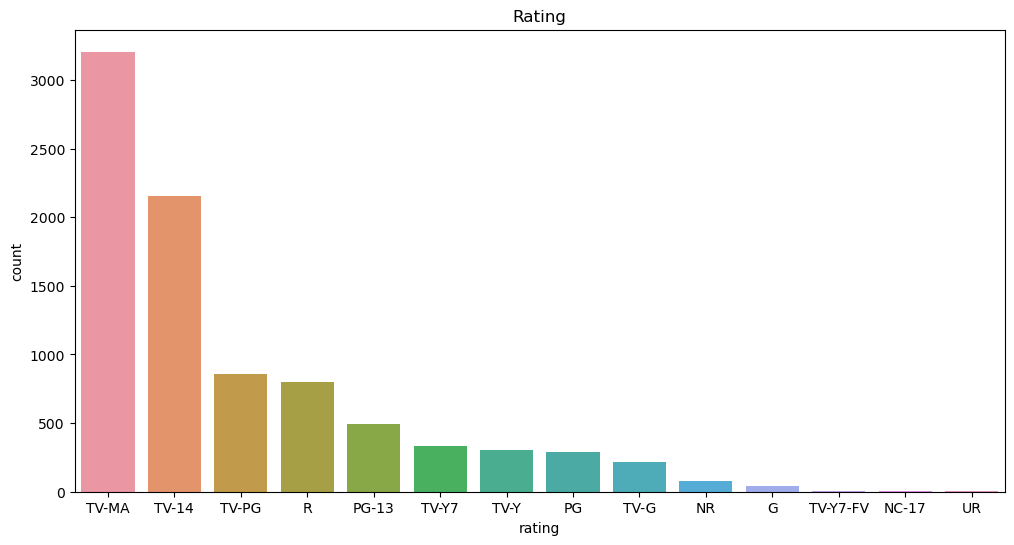

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Rating')
plt.show()

#### Contents with TV-MA is most prevalent and making contents to suit TV-MA is a safe bet to make

## Whats the best time to launch a TV show?

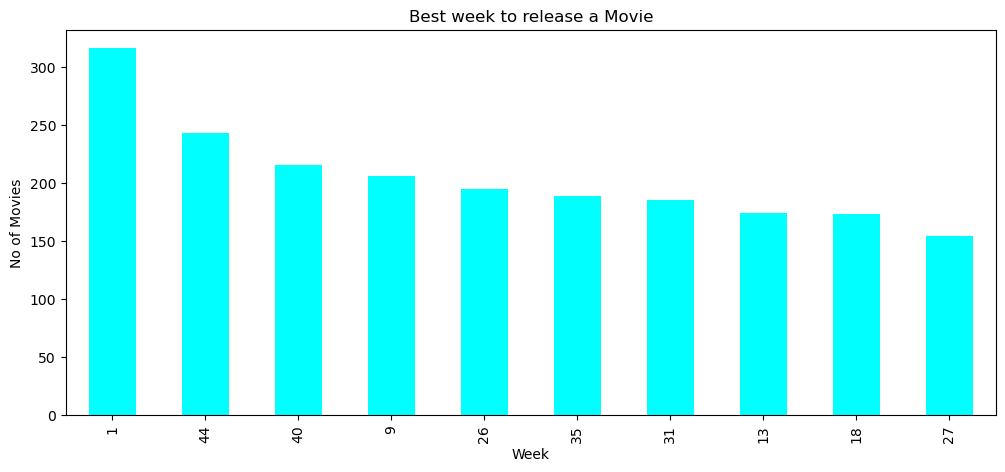

In [29]:
merge_df["date_added"] = pd.to_datetime(merge_df.date_added)
merge_df["week"]=merge_df.date_added.dt.isocalendar().week
movie_df = merge_df[merge_df['type'] == 'Movie']
movie_week=movie_df.groupby('week')['show_id'].nunique().nlargest(10)
plt.figure(figsize = (12,5))
movie_week.plot(kind='bar', color ='cyan')
plt.title("Best week to release a Movie")
plt.xlabel('Week')
plt.ylabel('No of Movies')
plt.show()

#### Best weeks to realease movie are 1st, 44th and 40th week

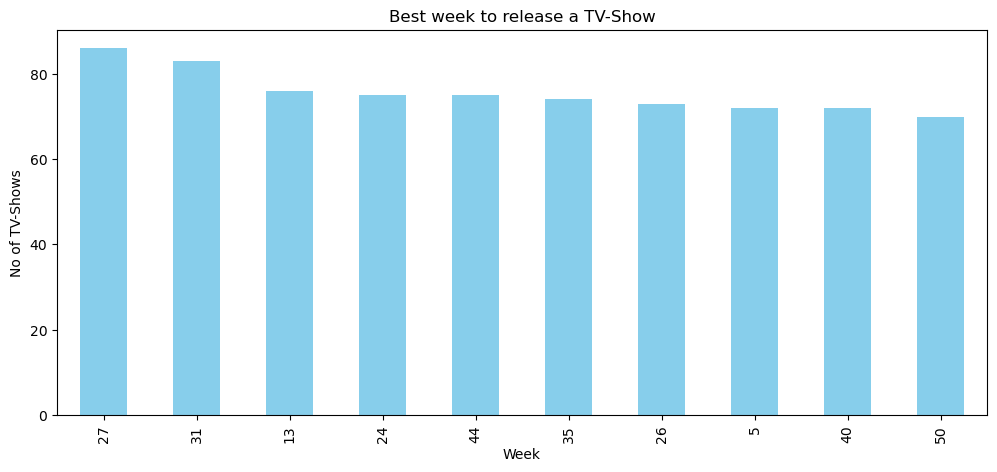

In [30]:
tv_df = merge_df[merge_df['type'] == 'TV Show']
tv_week=tv_df.groupby('week')['show_id'].nunique().nlargest(10)
plt.figure(figsize = (12,5))
tv_week.plot(kind='bar', color ='skyblue')
plt.title("Best week to release a TV-Show")
plt.xlabel('Week')
plt.ylabel('No of TV-Shows')
plt.show()

#### Best weeks to release a TV-Show are 27th, 31th and 13th week

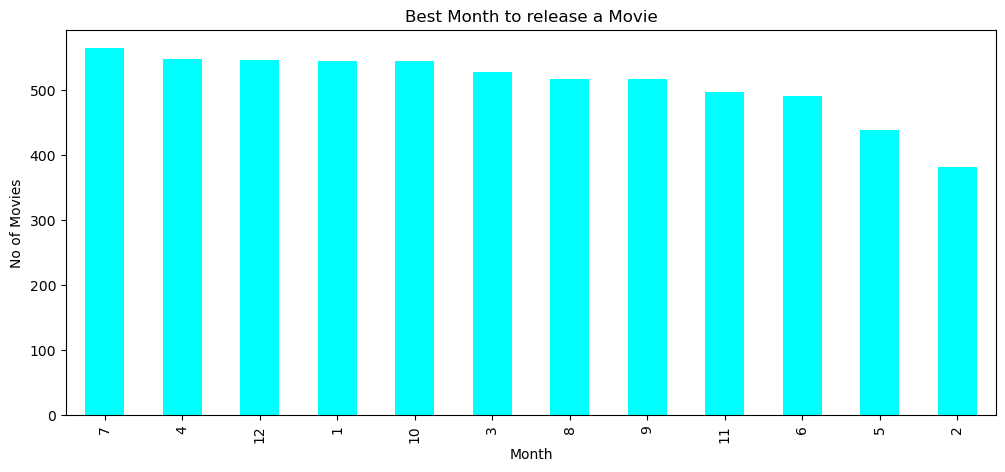

In [31]:
merge_df["month"]=merge_df.date_added.dt.month
movie_df = merge_df[merge_df['type'] == 'Movie']
movie_month=movie_df.groupby('month')['show_id'].nunique().nlargest(12)
plt.figure(figsize = (12,5))
movie_month.plot(kind='bar', color ='cyan')
plt.title("Best Month to release a Movie")
plt.xlabel('Month')
plt.ylabel('No of Movies')
plt.show()

#### There ssems to be an even spread of movie releases acroos most months except on the months February and May

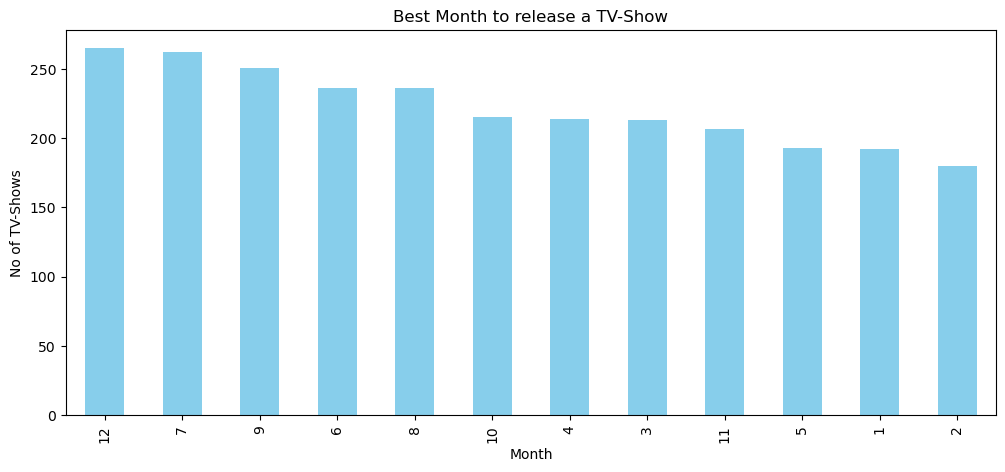

In [32]:
tv_df = merge_df[merge_df['type'] == 'TV Show']
tv_month=tv_df.groupby('month')['show_id'].nunique().nlargest(12)
plt.figure(figsize = (12,5))
tv_month.plot(kind='bar', color ='skyblue')
plt.title("Best Month to release a TV-Show")
plt.xlabel('Month')
plt.ylabel('No of TV-Shows')
plt.show()

#### Best month for TV-show releases are December, Jyuly and September

## Analysis of actors/directors of different types of shows/movies.

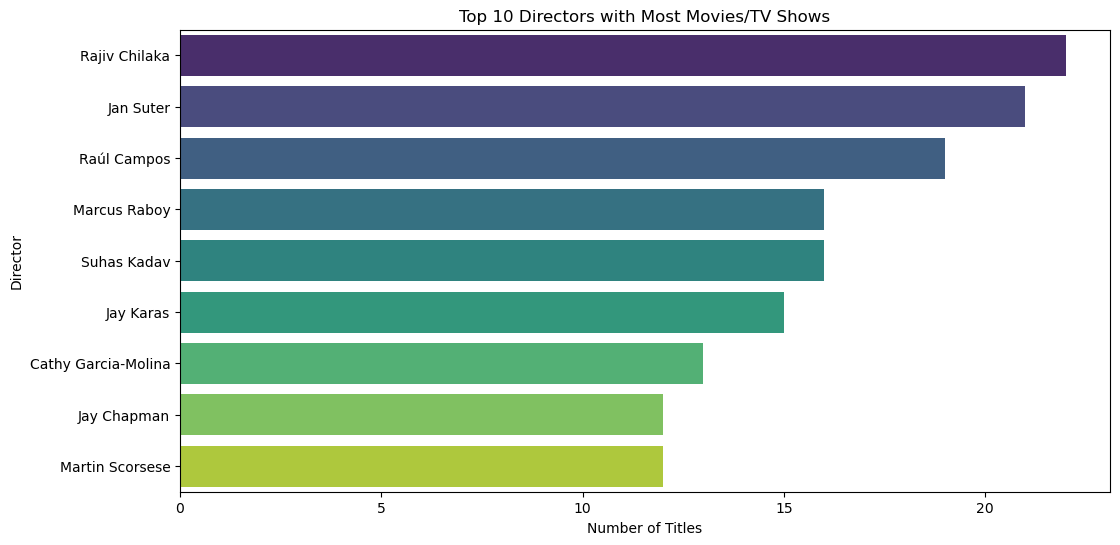

In [33]:
directors = merge_df.groupby('director_y')['show_id'].nunique().nlargest(10)
actors = merge_df.groupby('cast_y')['show_id'].nunique().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=directors[1:].values, y=directors[1:].index, palette='viridis', orient='h')
plt.title('Top 10 Directors with Most Movies/TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

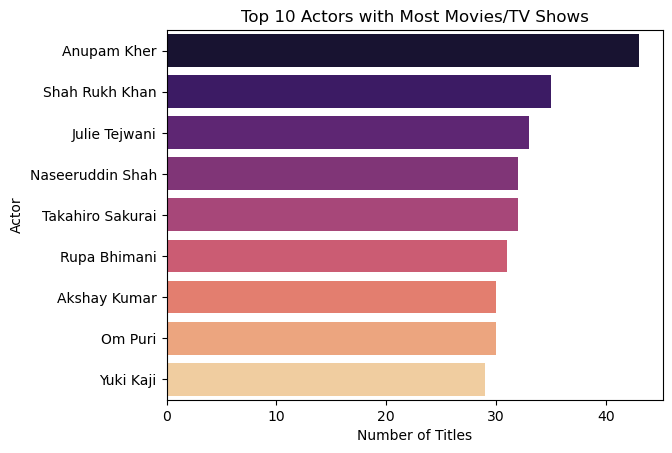

In [34]:
sns.barplot(x=actors[1:].values, y=actors[1:].index, palette='magma', orient='h')
plt.title('Top 10 Actors with Most Movies/TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

## Which genre movies are more popular or produced more

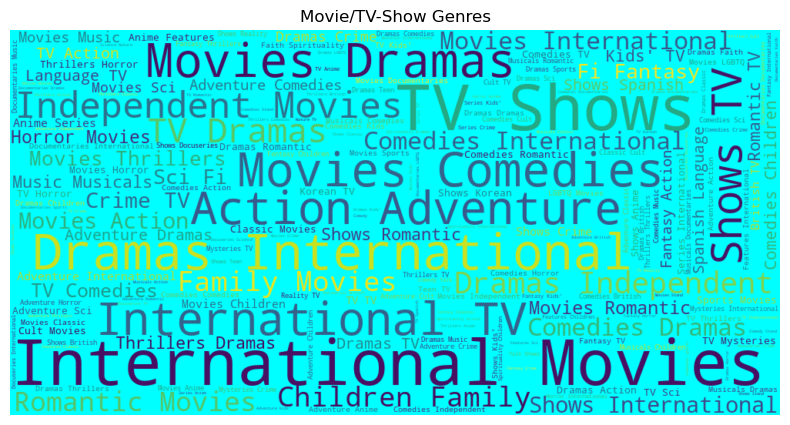

In [35]:
genres = ' '.join(merge_df['listed'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='aqua').generate(genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie/TV-Show Genres')
plt.show()

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')
df['days_to_add'] = (df['date_added'] - df['release_year']).dt.days
add_day_mode = df['days_to_add'].mode().values[0]
print("Days to add to Netflix: ", add_day_mode)

Days to add to Netflix:  334


## Runtime of Movies and TV-Shows

In [38]:
df_movies = df[df.type.str.contains('Movie')] 
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)',expand = False).astype(int)
pd.options.mode.chained_assignment = None  # To remove warning

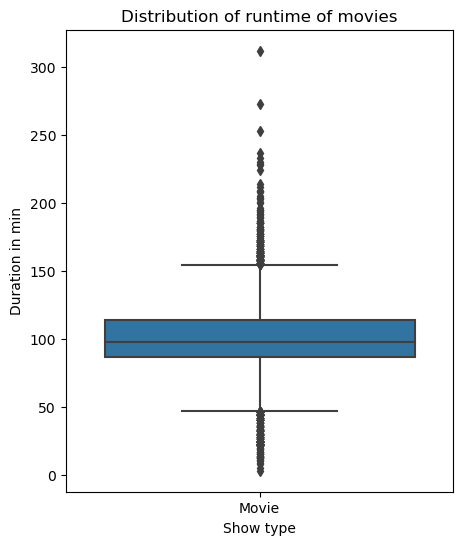

In [39]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df_movies, x = 'type', y = 'duration')
plt.title('Distribution of runtime of movies')
plt.xlabel('Show type')
plt.ylabel('Duration in min')
plt.show()

#### Average movies run for 100 min but there seems to be a lots of outlirers ranging from 10 min to upwards of 300 min

In [40]:
df_tv = df[df.type.str.contains('TV Show')] 
df_tv['duration'] = df_tv['duration'].str.extract('(\d+)',expand = False).astype(int)

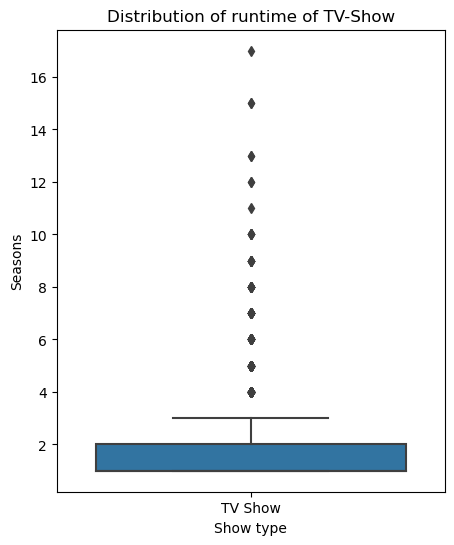

In [41]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df_tv, x = 'type', y = 'duration')
plt.title('Distribution of runtime of TV-Show')
plt.xlabel('Show type')
plt.ylabel('Seasons')
plt.show()

#### From the bxoplot we can see most shows have one to three seasons, there are some outliers of which some have 17 seasons,
#### This shows that Netflix prefers shorter series.

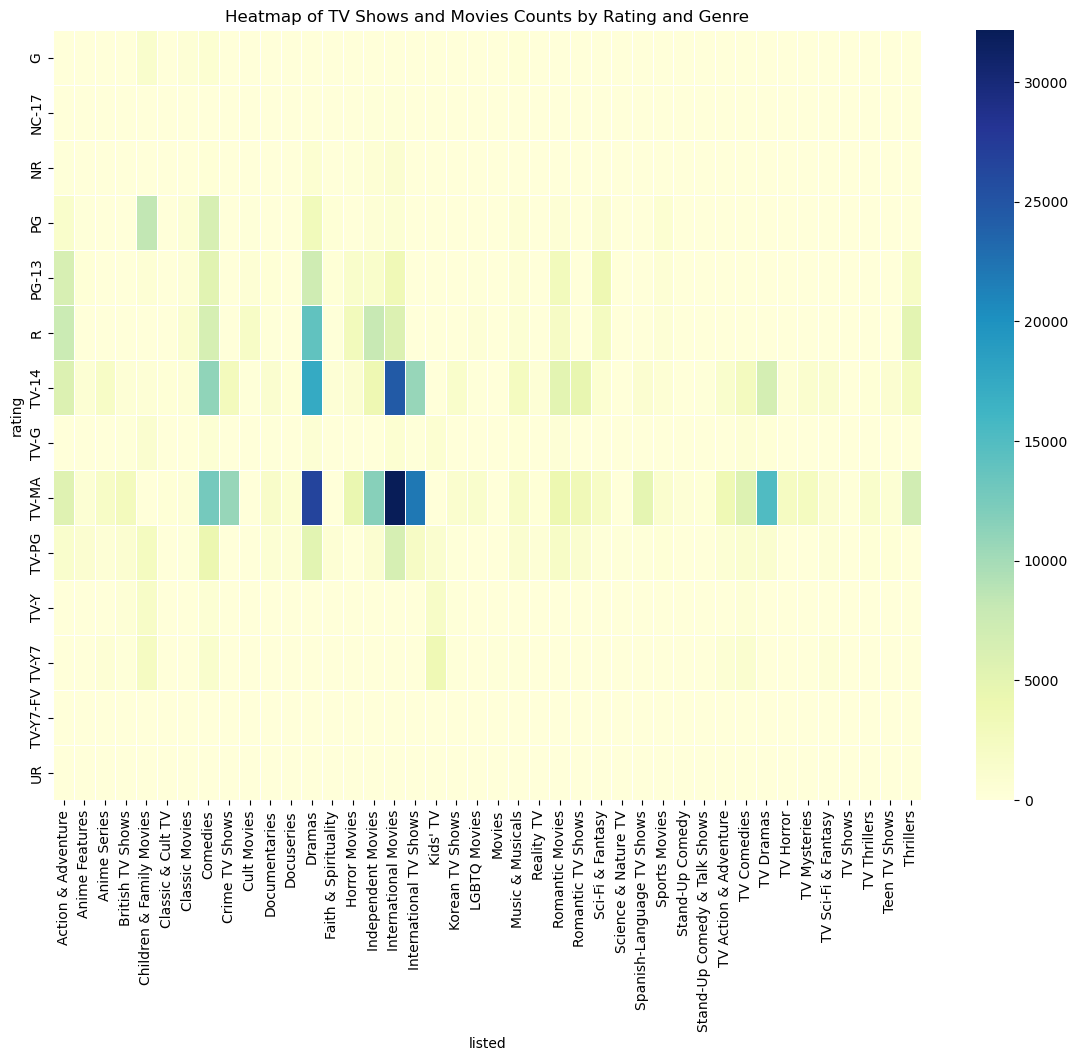

In [42]:
combined_df = pd.concat([tv_df, movie_df])
heatmap_data = combined_df.groupby(['rating', 'listed']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of TV Shows and Movies Counts by Rating and Genre')
plt.show()

#### Internationl Movies with TV-MA rating has the most number of Movies produced and is very profitable to make those kind of movies